# Data visualization with Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1,d in dict.items() for k2,v in d.items()}
with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
# plt.style.use('dracula')

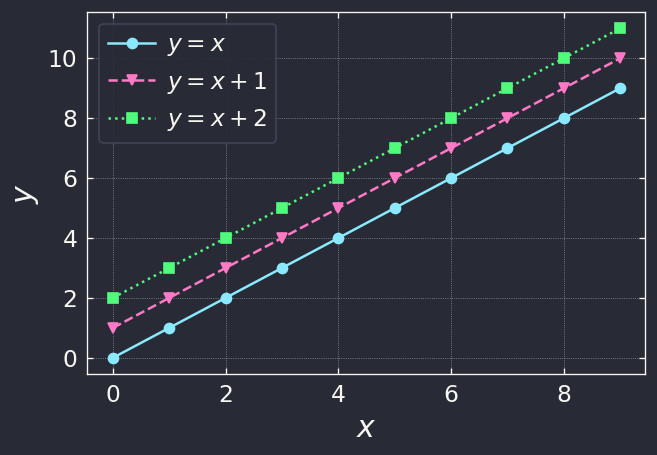

In [3]:
def test():
    x = np.arange(10)
    plt.plot(x, x,   marker='o', linestyle='-',  label='$y=x$')
    plt.plot(x, x+1, marker='v', linestyle='--', label='$y=x+1$')    
    plt.plot(x, x+2, marker='s', linestyle=':',  label='$y=x+2$')
    
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.legend()
    
test()

## 気温の時系列

In [4]:
# データ読み込み
path_temperature = '../data/kanazawa2017-2019_min.csv'
data = pd.read_csv(path_temperature, header=None, names=['date', 'time', 'temperature'])
data.head()

,date,time,temperature
0,2017/1/1,1:00,7.5
1,2017/1/1,2:00,7.4
2,2017/1/1,3:00,6.8
3,2017/1/1,4:00,6.3
4,2017/1/1,5:00,5.9


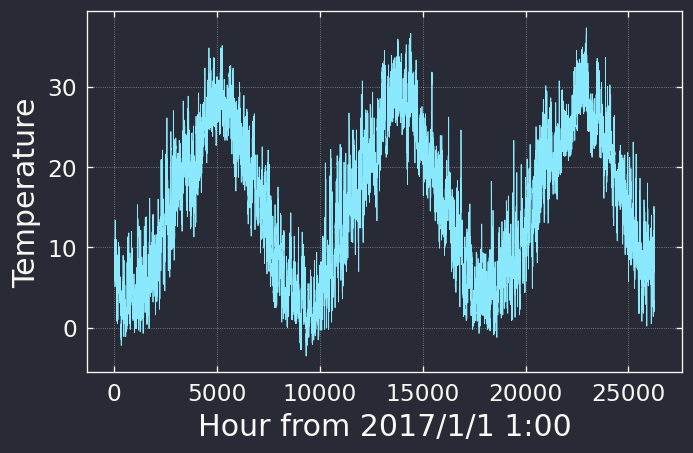

In [5]:
# 時系列をプロット
plt.plot(data['temperature'], lw=0.5)
plt.xlabel('Hour from 2017/1/1 1:00')
plt.ylabel('Temperature')

plt.tight_layout()
plt.savefig('../figure/temperatures.png')

## 気温の差分時系列

In [6]:
# データ読み込み
path_temperature_diff = '../result/kanazawa2017-2019_diff.csv'
data_diff = pd.read_csv(path_temperature_diff, header=None, names=['diff'])
data_diff.head()

,diff
0,-0.1
1,-0.6
2,-0.5
3,-0.4
4,0.2


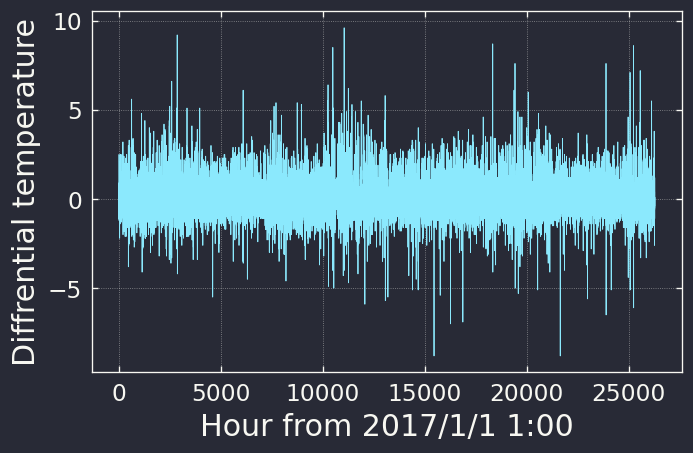

In [7]:
# 時系列をプロット
plt.plot(data_diff['diff'], lw=0.5)
plt.xlabel('Hour from 2017/1/1 1:00')
plt.ylabel('Diffrential temperature')

plt.tight_layout()
plt.savefig('../figure/diff_temperatures.png')

## 月ごとの平均気温

In [8]:
# 年月日から年と月の情報を取り出す
data['dt_date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')
data['year']  = data['dt_date'].dt.year
data['month'] = data['dt_date'].dt.month
data.head()

,date,time,temperature,dt_date,year,month
0,2017/1/1,1:00,7.5,2017-01-01,2017,1
1,2017/1/1,2:00,7.4,2017-01-01,2017,1
2,2017/1/1,3:00,6.8,2017-01-01,2017,1
3,2017/1/1,4:00,6.3,2017-01-01,2017,1
4,2017/1/1,5:00,5.9,2017-01-01,2017,1


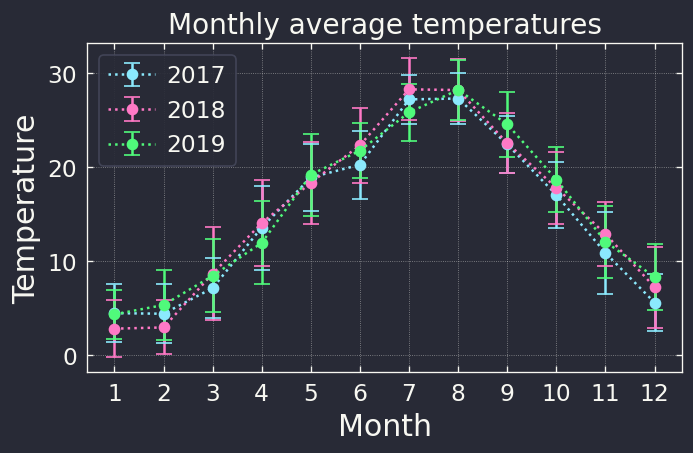

In [9]:
# 年ごとに月平均気温を計算してプロット
# エラーバーを描く（標準偏差を使用）
def calc_monthly_average():
    for year in data['year'].unique():
        yearly_temperatures = data[data['year'] == year]
        g = yearly_temperatures.groupby('month')['temperature']
        ave = g.mean().sort_index()
        std = g.std(ddof=0).sort_index()
        date = ave.index
        plt.errorbar(date, ave, yerr=std, capsize=5, marker='o', linestyle=':', label=year)
    
    plt.title('Monthly average temperatures')
    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.xticks(data['month'].unique())
    plt.yticks([0,10,20,30])
    plt.legend(handletextpad=0.5)

    plt.tight_layout()
    plt.savefig('../figure/monthly_average_temperature.png')
    
calc_monthly_average()

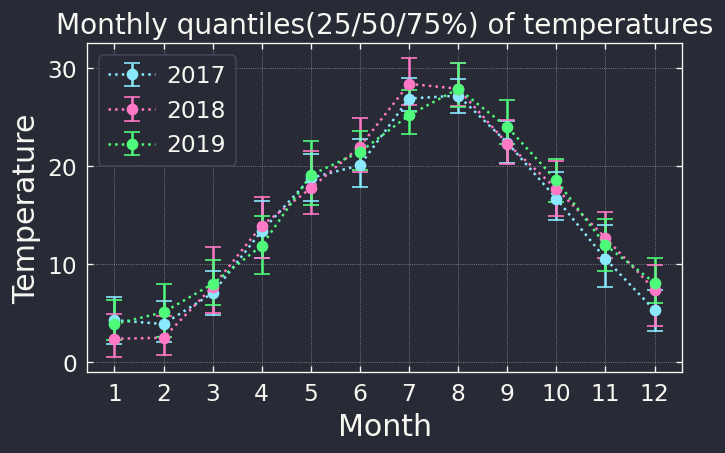

In [10]:
# 年ごとに月単位で気温の分位点を計算してプロット
# エラーバーを描く（Q1,Q2,Q3を使用）
def calc_monthly_quantiles():
    for year in data['year'].unique():
        yearly_temperatures = data[data['year'] == year]
        g = yearly_temperatures.groupby('month')['temperature']
        q1 = g.quantile(0.25).sort_index()
        q2 = g.quantile(0.50).sort_index()
        q3 = g.quantile(0.75).sort_index()
        date = q2.index
        plt.errorbar(date, q2, yerr=[q2-q1,q3-q2], capsize=5, marker='o', linestyle=':', label=year)
    
    plt.title('Monthly quantiles(25/50/75%) of temperatures')
    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.xticks(data['month'].unique())
    plt.yticks([0,10,20,30])
    plt.legend(handletextpad=0.5)

    plt.tight_layout()
    plt.savefig('../figure/monthly_quantiles_temperature.png')
    
calc_monthly_quantiles()

## 日ごとの統計量

In [11]:
# データ読み込み
path_daily_stats = '../result/daily_stats.csv'
daily_stats = pd.read_csv(path_daily_stats)
daily_stats['dt_date'] = pd.to_datetime(daily_stats['date'], format='%Y%m%d')
daily_stats.head()

,date,min,max,mu,std,dt_date
0,20170101,5.9,11.0,8.32500,1.57222,2017-01-01
1,20170102,5.1,13.4,9.15833,2.76419,2017-01-02
2,20170103,5.8,9.8,7.27917,1.14236,2017-01-03
3,20170104,6.2,11.0,8.04583,1.43555,2017-01-04
4,20170105,2.4,6.4,4.41250,1.20634,2017-01-05


Text(0, 0.5, 'Temperature')

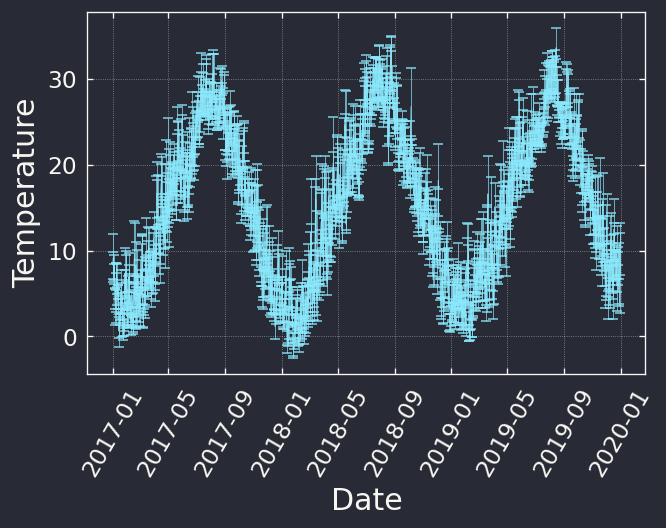

In [12]:
plt.errorbar(daily_stats['dt_date'], daily_stats['mu'], yerr=daily_stats['std'], 
             capsize=3, lw=0.5, alpha=0.8)
plt.xticks(rotation=60)
plt.xlabel('Date')
plt.ylabel('Temperature')